In [14]:
import numpy as np
from numpy import array, random, dot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

### Training Data

In [111]:
X, Y = datasets.make_blobs(n_samples=100, n_features=2, centers=3)

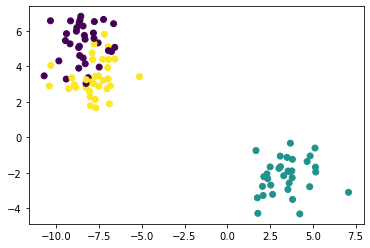

In [112]:
plt.scatter(X[:, 0], X[:, 1],c=[Y], cmap='viridis')
plt.show()

In [79]:
def encode_indices(y):
    '''
    Simple one hot encoder for softmax 
    y = all target labels (1,2,0,...,2)
    '''
    b = np.zeros((y.size, y.max() + 1))
    b[np.arange(y.size), y] = 1
    return b

## Neurons
- 3 neurons
- Z = W.X + B
- A = softmax(Z)
- loss : 
    - softmax cross-entropy, CE = - sum(y_c * log(A_c)) where c is the class propability
    - **== - dot_product(y , log(A))**

- dloss/dA Vector form: 
    - dL/dA = - (dL/dA1 , dL/dA2)
    - dL/dA = - (dA1 , dA2) simplified vector form
    - dA1 = - y1/A1, dA2 = - y1/A2,
    - **dA = - ( y / A )** vector form
    - we will keep the vector form of dL/dA for later multiplications
    
- dA/dZ :
    - d/dZ = (dZ1, dZ2) simplified vector form
    - dZ1 = (a1*(1-a1),  - aj * a1)
    - dZ2 = (- a2 * a1, a2*(1-a2))
    - **(... ... ...)nxn matrix (i = row index, j = column index)**
        - with diagonals => ai * (1-ai)
        - otherwise => -ai*aj
- dZ/dW = X
- dZ/dB = 1

## Shapes
- input = 1x2
- W = 2x3, B = 1x3
- Z = 1x3
- A = 1x3

In [56]:
def softmax(z):
    # Not Stable, x minus x_max better
    exp_outputs = np.exp(z)
    probabilities = exp_outputs / np.sum(exp_outputs, axis=1, keepdims=True)
    return probabilities

In [132]:
def softmax_grad(A):
    # vectorized form
    return np.diagflat(A) - np.outer(A, A)

In [127]:
softmax_derivative(A)

array([[ 0, -2, -3],
       [-2, -2, -6],
       [-3, -6, -6]])

In [57]:
def softmax_derivative(A):
    '''
    matrix form (n,n) size
    diagonals derivative => ai(1-ai) , i = row index
    otherwise => -ai x aj, j = column index
    [ai(1-ai) ...  -ai x aj]
    [...    ai(1-ai)    ...]
    [...      ...       ...]
    [-ai x aj ...  aj(1-aj)]
    '''
    dZ = np.diag(A)
    for i in range(len(A)):
        for j in range(len(A)):
            if i==j:
                dZ[i, j] = A[i] * (1- A[i])
            else:
                dZ[i, j] = -A[i] * A[j]
    return dZ

In [104]:
def training(X, Y, lr = 0.01, epochs = 10):
    W = np.random.uniform(-1,1, size=(3,2)) # size(n_units, A_prev dimension)
    b = np.random.uniform(-1,1, size=(1,3)) # size(1, n_units)

    Z = np.zeros(shape=(1,3))
    A = np.zeros(shape=(1,3))
    
    epoch_loss = []
    
    for epoch in range(epochs):
        epoch_loss.append(0)
        for i, x in enumerate(X):
            
            # forward
            Z = dot(x, W.T) + b
            A = softmax(Z).flatten()
            y_encoded = Y[i].flatten()
  
            # loss
            loss_i = - dot(y_encoded, np.log(A)) # CE
            
            # backward
            dA =   - y_encoded / A # [1x3]
 
            dZ = softmax_derivative(A) # [3x3]
            dW = np.outer(dot(dA , dZ) , x) # outer product  ([1x3].[3x3])  (x) [1x2] => [3x2]
            db = dot(dA , dZ) * 1 # [1x3]
        
            W = W - lr * dW
            b = b - lr * db
            epoch_loss[epoch] += loss_i
            
        #print(epoch_loss[-1])
    plt.plot(epoch_loss)
    print('last loss', epoch_loss[-1])
    return W, b

last loss 35.49522168379316


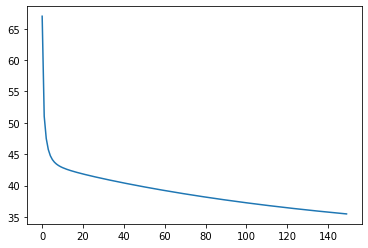

In [113]:
y_encoded = encode_indices(Y)
W, b = training(X, y_encoded, lr = 0.01, epochs=150)

In [123]:
def evaluate(X, W, b):
    y_hat = []
    for i, x in enumerate(X):
        Z = dot(x, W.T) + b
        A = softmax(Z)
        y_hat.append(np.argmax(A))
        
    return np.array(y_hat) 

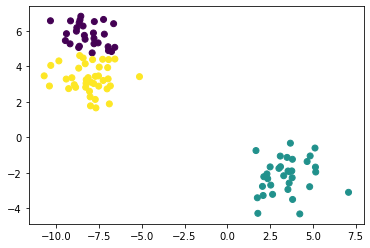

In [124]:
y_hat= evaluate(X, W, b)
plt.scatter(X[:, 0], X[:, 1],c=[y_hat])
plt.show()